# Importing libraries

In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

# Loading Data

In [300]:
file_path = 'C:/Users/ericm/OneDrive/Desktop/Projects/Machine learning Projects/Ecommerce Customer Churn Analysis and Prediction/myenv/PROJECT/data.csv'
df = pd.read_csv(file_path)

# EDA

In [301]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [302]:
df.tail(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5620,55621,0,3.0,Mobile Phone,1,35.0,Credit Card,Female,4.0,5,Mobile Phone,5,Single,3,0,15.0,1.0,2.0,5.0,163
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,234
5622,55623,0,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,NaN,7.0,245
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [303]:
print('Size of data',df.shape)

Size of data (5630, 20)


The DataFrame contains 5630 entries (rows).
There are 20 columns in the DataFrame, each representing a different feature or attribute.

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Info gave the data type of each columns and also missing values

In [305]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


* The Churn column is binary, with a mean of approximately 0.17, indicating that around 17% of the customers churned.


* The Tenure column has a mean of approximately 10.19 months, with a standard deviation of 8.56, showing some variability in customer tenure.


* The WarehouseToHome column has missing values, as its count is lower than the total count of entries (5630).


* The CashbackAmount column has a maximum value of 325.

# Handling Missing Values

In [306]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

I have observe missing values of of average 255
* The Tenure column has 264 missing values.
* The WarehouseToHome column has 251 missing values.
* The HourSpendOnApp column has 255 missing values.
* The OrderAmountHikeFromlastYear column has 265 missing values.
* The CouponUsed column has 256 missing values.
* The OrderCount column has 258 missing values.
* The DaySinceLastOrder column has 307 missing values.

In [307]:
missing_values_count = df.isnull().sum()
# Filter columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0].index

# Filter rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Create a new DataFrame with only the columns and rows with missing values
df_missing_values = rows_with_missing_values[columns_with_missing_values]

In [308]:
df_missing_values.head(50)

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
1,NaN,8.0,3.0,15.0,0.0,1.0,0.0
2,NaN,30.0,2.0,14.0,0.0,1.0,3.0
4,0.0,12.0,NaN,11.0,1.0,1.0,3.0
6,NaN,11.0,2.0,14.0,0.0,1.0,0.0
7,NaN,6.0,3.0,16.0,2.0,2.0,0.0
8,13.0,9.0,NaN,14.0,0.0,1.0,2.0
9,NaN,31.0,2.0,12.0,1.0,1.0,1.0
10,4.0,18.0,2.0,NaN,9.0,15.0,8.0
15,NaN,12.0,3.0,22.0,1.0,1.0,2.0
16,0.0,12.0,NaN,18.0,1.0,1.0,0.0


Theres only one missing value in a row and the data is small so cant drope missing values.

Creating Histogram function

In [309]:
def create_histograms(dataframe):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed for the subplots

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))  # Create the subplots

    for idx, column in enumerate(dataframe.columns):
        row_idx = idx // 3
        col_idx = idx % 3

        sns.histplot(dataframe[column], bins=5, color='red', edgecolor='black', ax=axes[row_idx, col_idx])  # Plot on the appropriate axis
        axes[row_idx, col_idx].set_title(f'Histogram with Density Plot of {column}')
        axes[row_idx, col_idx].set_xlabel('Value')
        axes[row_idx, col_idx].set_ylabel('Frequency / Density')

    # Hide any empty subplots
    for idx in range(len(dataframe.columns), num_rows * 3):
        row_idx = idx // 3
        col_idx = idx % 3
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

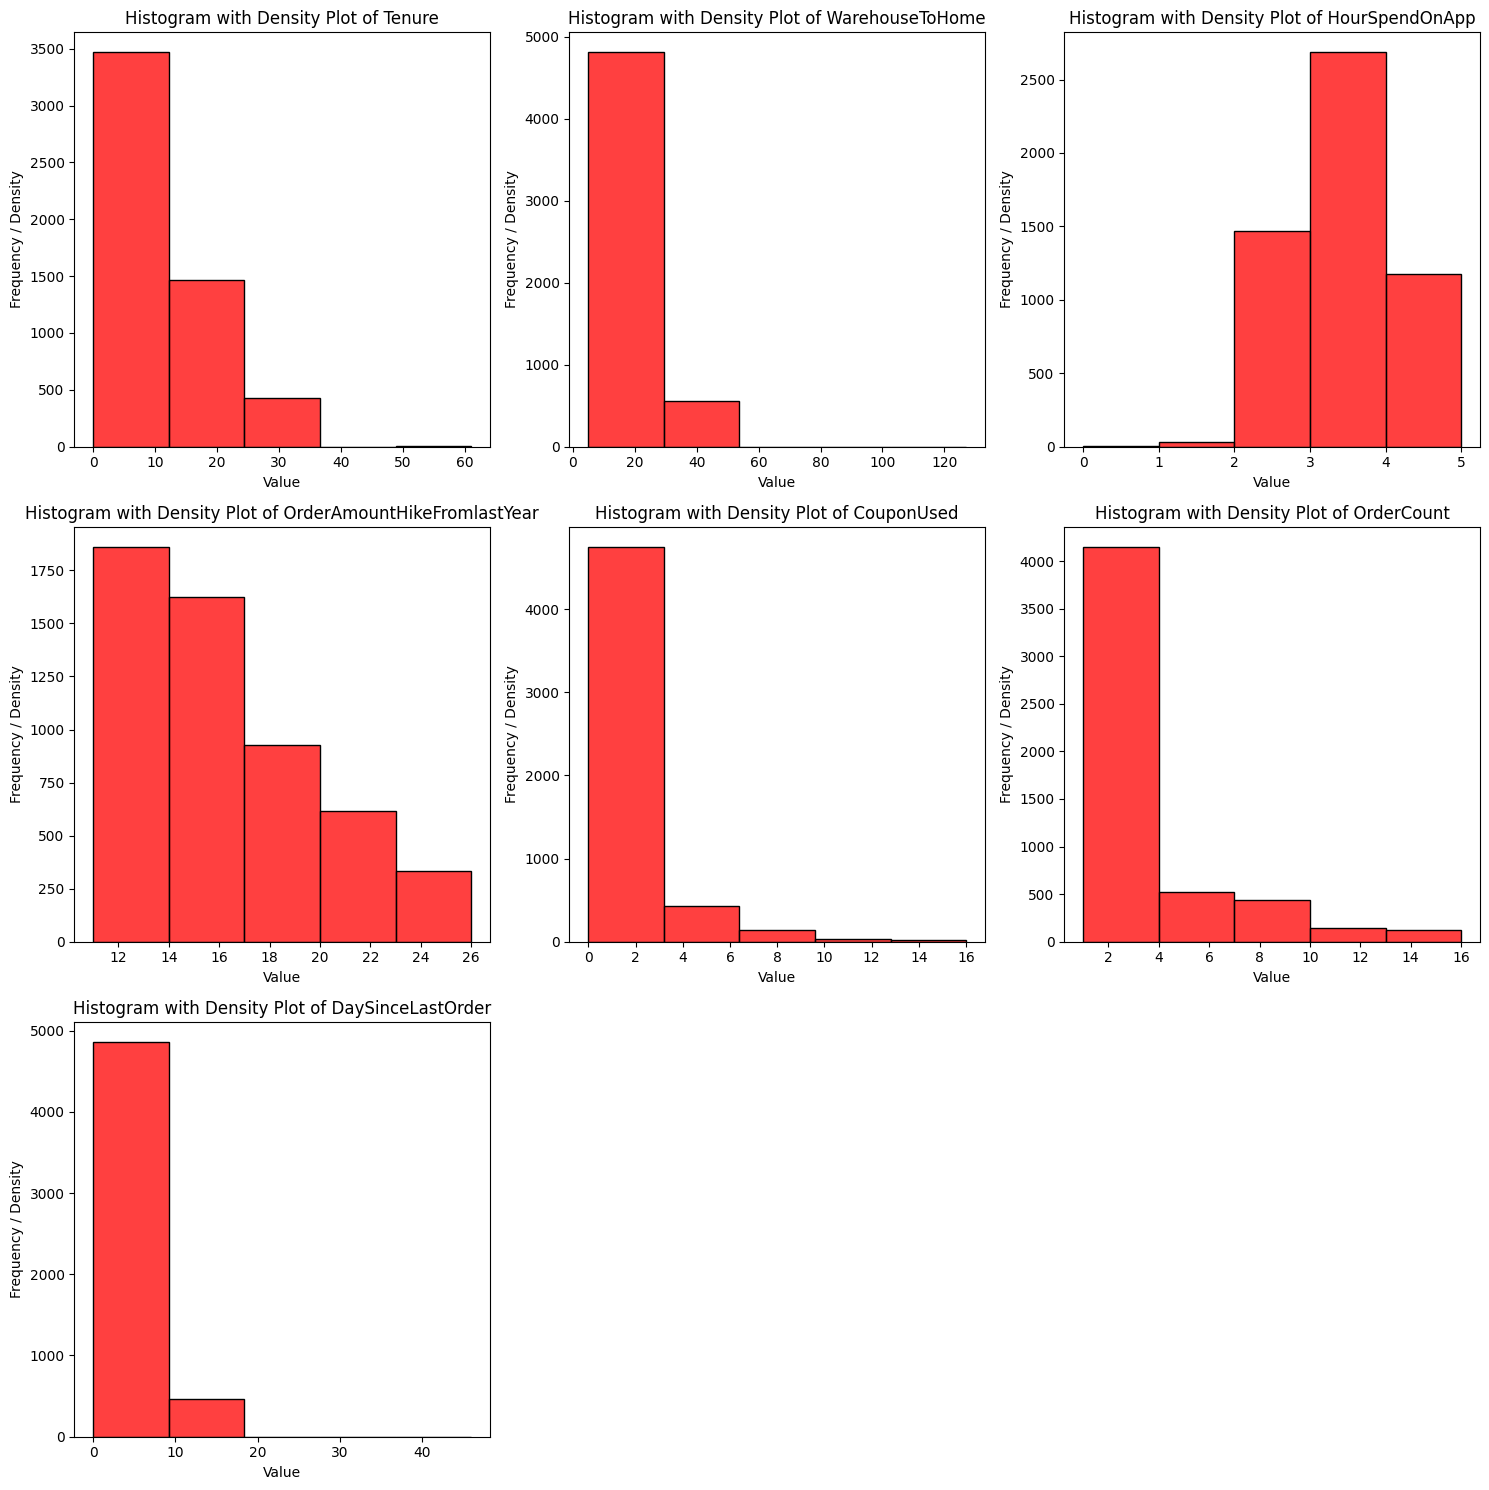

In [310]:
create_histograms(df[columns_with_missing_values])

Filled missing values with median because the data is skewed.

In [311]:
for column in columns_with_missing_values:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [312]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [313]:
df.to_csv('Tableau_visualization.csv', index=False)

# Visualization

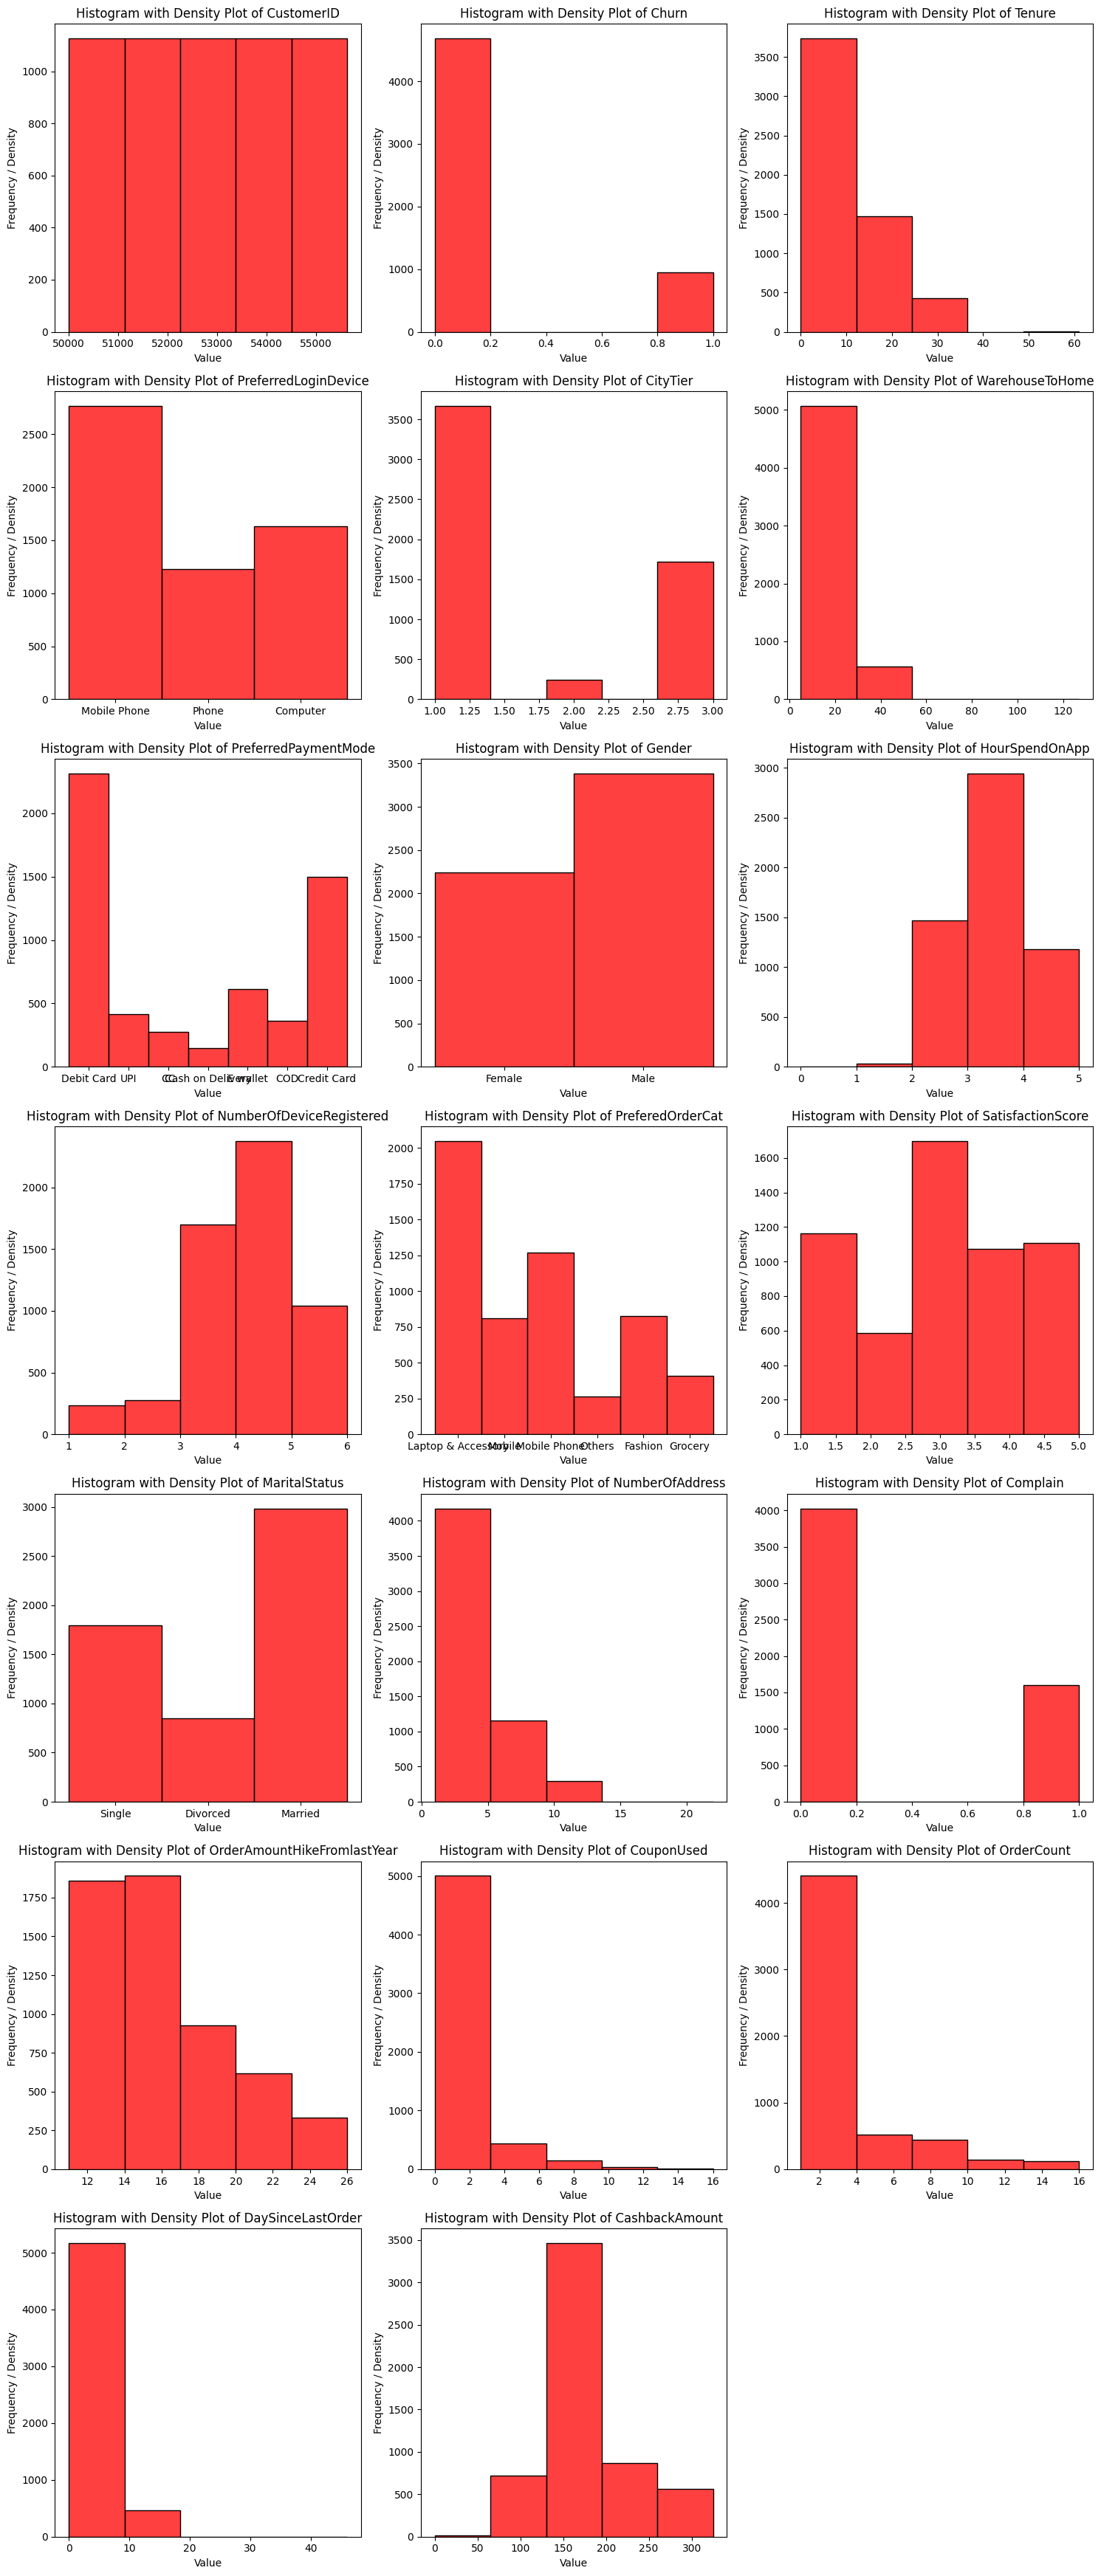

In [314]:
create_histograms(df)

PIE CHART

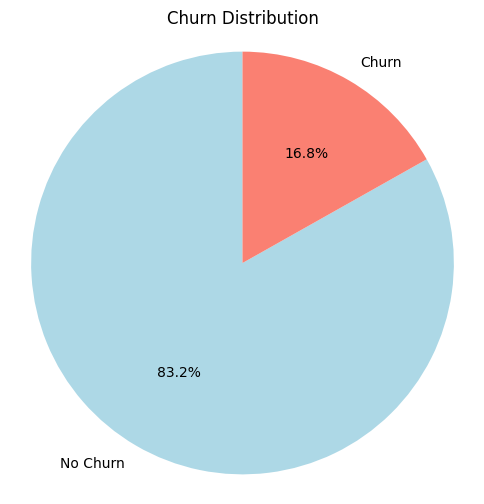

In [315]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], colors=['lightblue', 'salmon'], autopct='%1.1f%%', startangle=90)
plt.title("Churn Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


I can observe that the data is highly imbalance NOCHURN = 83.2% and CHURN = 16.8%

# Handling categorical values

In [316]:
cat_col=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','PreferedOrderCat', 'MaritalStatus']

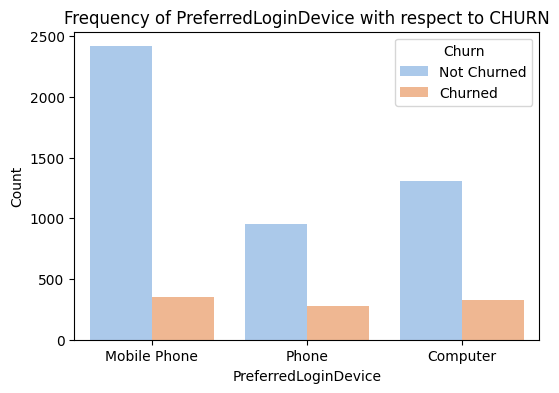

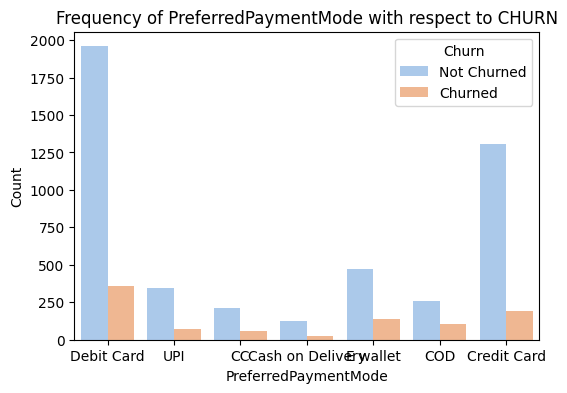

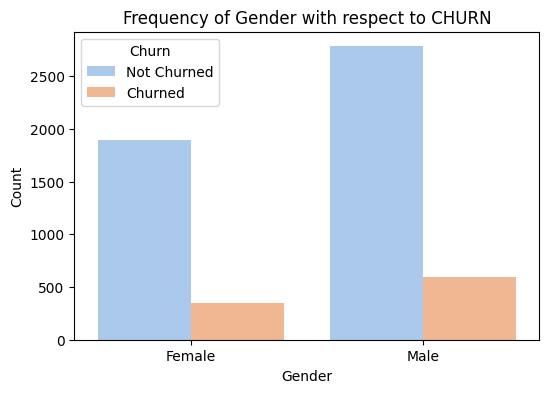

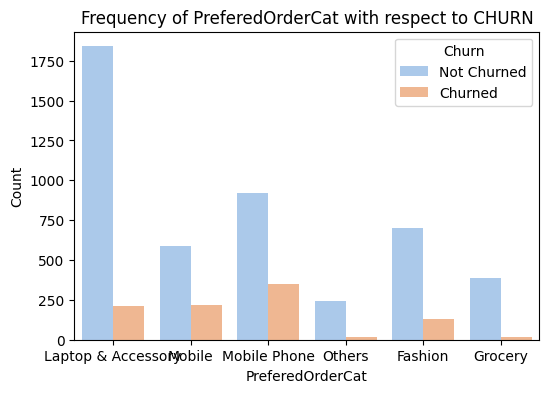

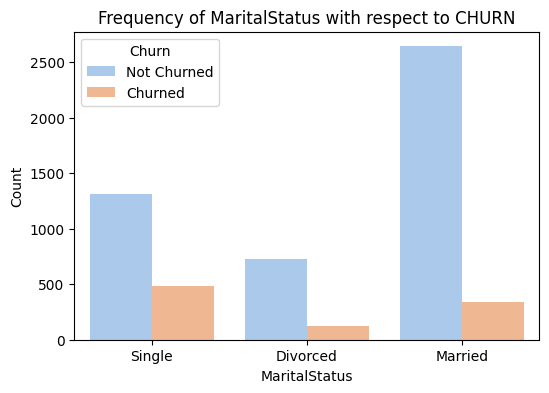

In [317]:
cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Create bar plots with frequency count and mean of 'Churn'
for cat_col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=cat_col, data=df, hue='Churn', palette='pastel')
    plt.title(f'Frequency of {cat_col} with respect to CHURN')
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
    plt.show()



Used Frequency encoding 

behind this approach is to capture the relationship between the frequency of each category and the target variable (in the case of supervised learning) or any other relevant outcome.

In [318]:
cat_col=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','PreferedOrderCat', 'MaritalStatus']


In [319]:
cat_col=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','PreferedOrderCat', 'MaritalStatus']

# Create a dictionary to store reverse mapping
reverse_mapping = {}

# Frequency encoding for each categorical column
for cat_col_name in cat_col:
    frequency_map = df[cat_col_name].value_counts(normalize=True).to_dict()
    df[cat_col_name] = df[cat_col_name].map(frequency_map)
    
    # Store reverse mapping
    reverse_mapping[cat_col_name] = {v: k for k, v in frequency_map.items()}

# Print reverse mapping
for col, mapping in reverse_mapping.items():
    print(f"Reverse mapping for {col}:")
    for encoded_value, original_value in mapping.items():
        print(f"{encoded_value:.2f} -> {original_value}")


Reverse mapping for PreferredLoginDevice:
0.49 -> Mobile Phone
0.29 -> Computer
0.22 -> Phone
Reverse mapping for PreferredPaymentMode:
0.41 -> Debit Card
0.27 -> Credit Card
0.11 -> E wallet
0.07 -> UPI
0.06 -> COD
0.05 -> CC
0.03 -> Cash on Delivery
Reverse mapping for Gender:
0.60 -> Male
0.40 -> Female
Reverse mapping for PreferedOrderCat:
0.36 -> Laptop & Accessory
0.23 -> Mobile Phone
0.15 -> Fashion
0.14 -> Mobile
0.07 -> Grocery
0.05 -> Others
Reverse mapping for MaritalStatus:
0.53 -> Married
0.32 -> Single
0.15 -> Divorced


# Outliear Detection

In [320]:
def create_box_plots(dataframe):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed for the subplots

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))  # Create the subplots

    for idx, column in enumerate(dataframe.columns):
        row_idx = idx // 3
        col_idx = idx % 3

        sns.boxplot(dataframe[column], ax=axes[row_idx, col_idx])  # Plot on the appropriate axis
        axes[row_idx, col_idx].set_title(f'Box Plot of {column}')
        axes[row_idx, col_idx].set_xlabel('Value')

    # Hide any empty subplots
    for idx in range(len(dataframe.columns), num_rows * 3):
        row_idx = idx // 3
        col_idx = idx % 3
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


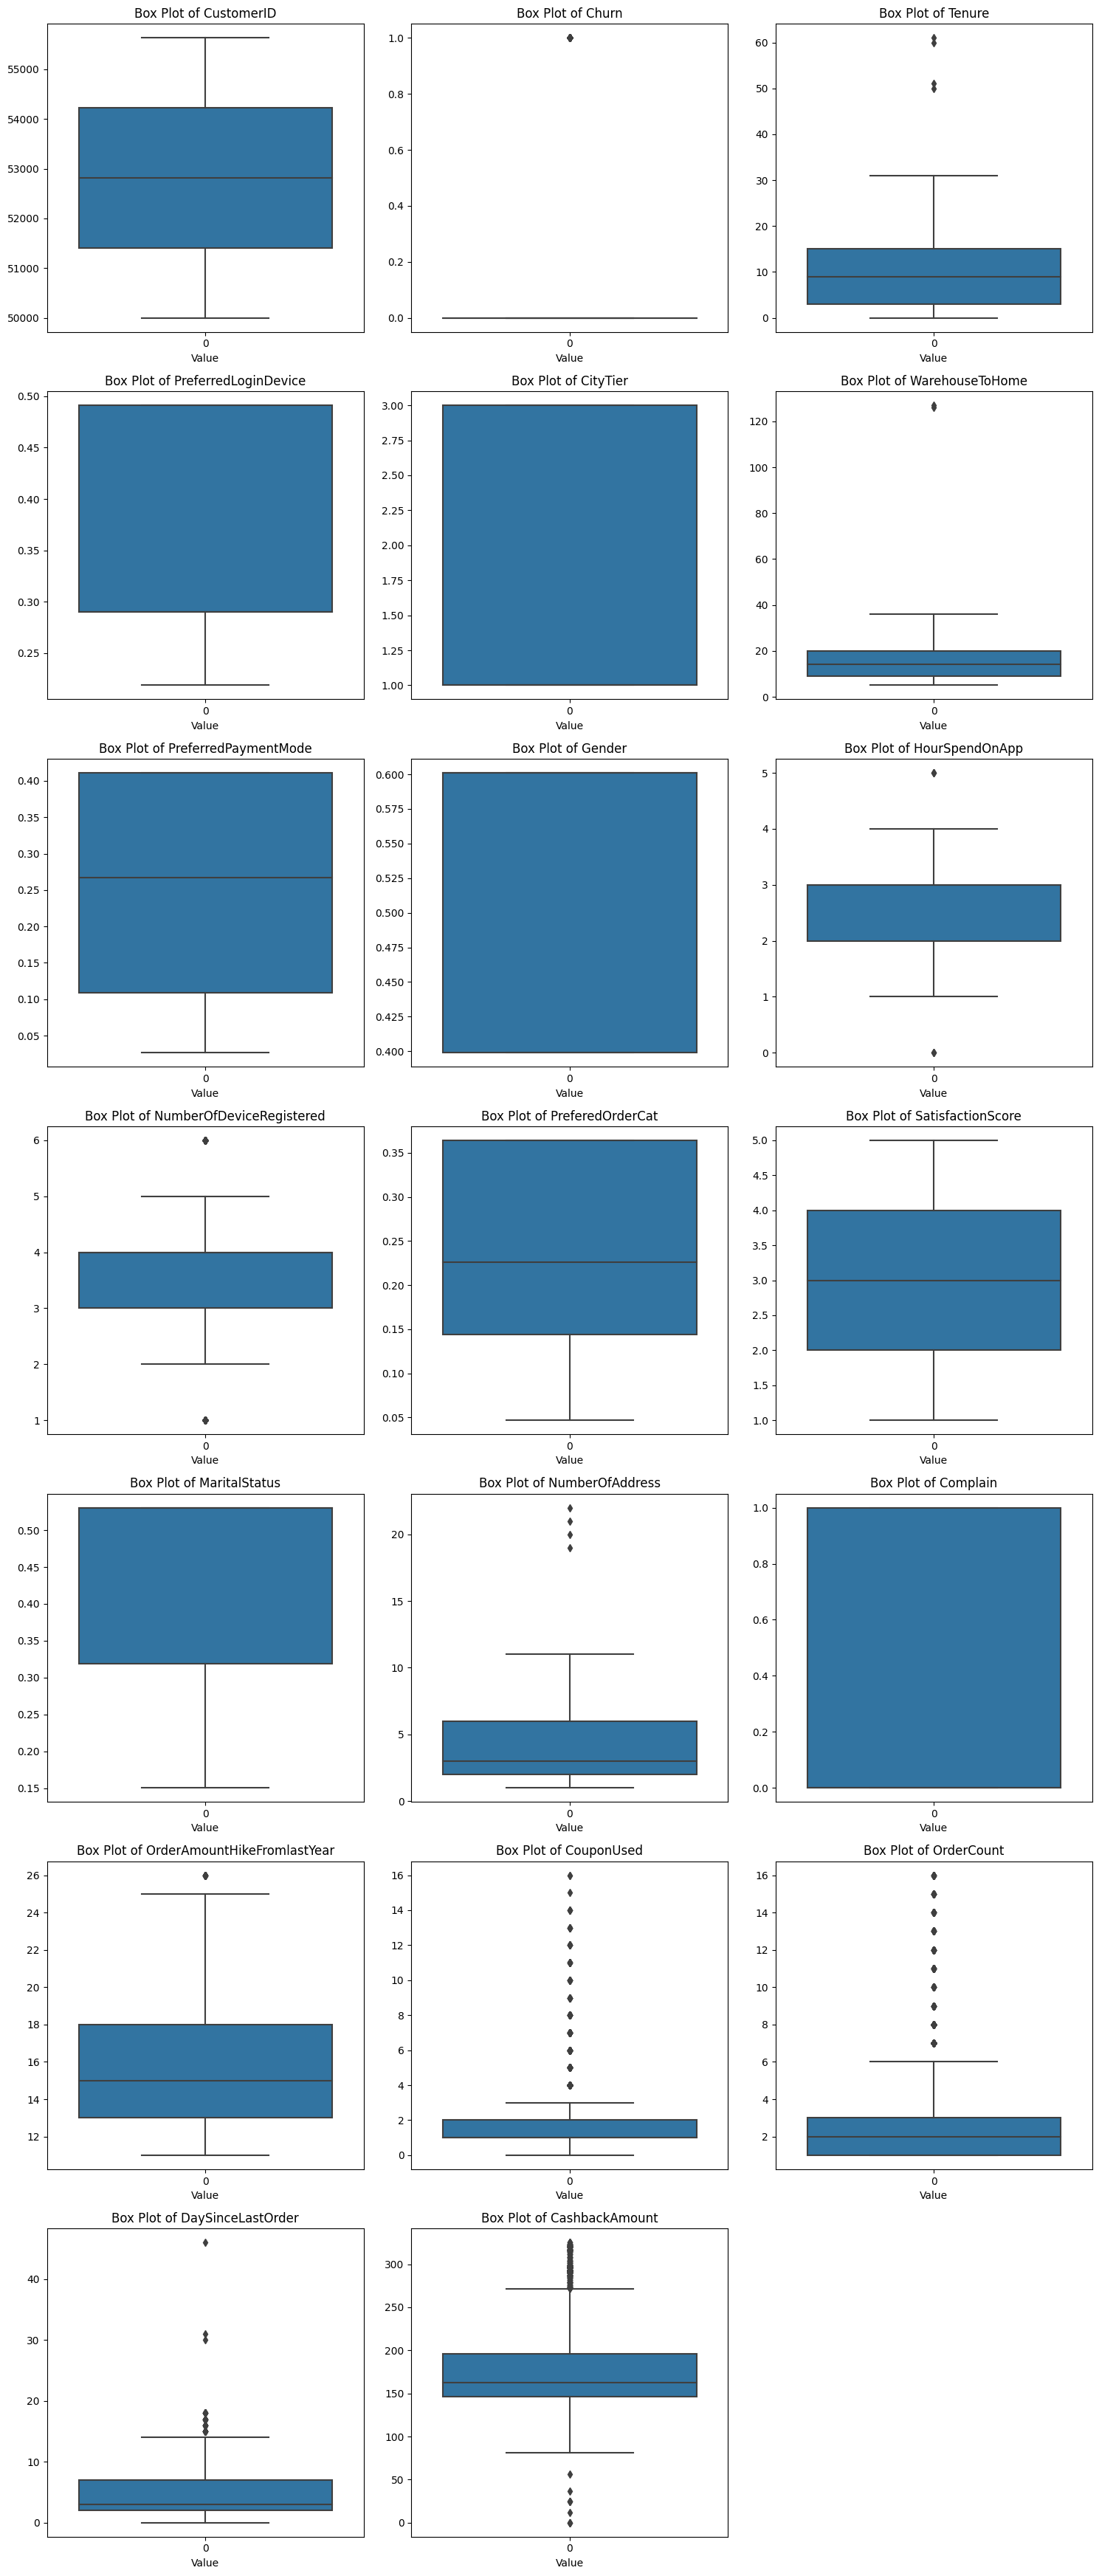

In [321]:
create_box_plots(df)

# Heat MAp

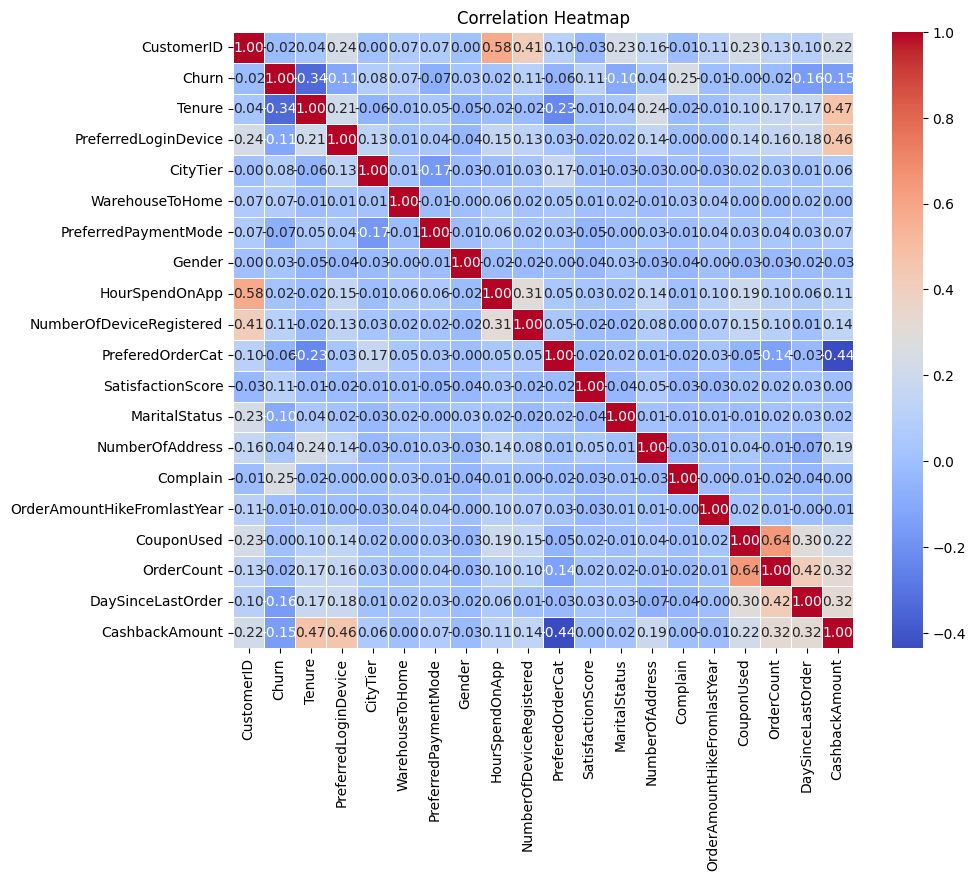

In [322]:
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [323]:
correlation_with_churn = df.corr()['Churn'].drop('Churn')
sorted_correlation = correlation_with_churn.abs().sort_values(ascending=False)

print("Correlation with Churn:")
print(sorted_correlation*100)

Correlation with Churn:
Tenure                         33.783084
Complain                       25.018825
DaySinceLastOrder              15.587091
CashbackAmount                 15.416120
PreferredLoginDevice           11.428731
NumberOfDeviceRegistered       10.793855
SatisfactionScore              10.548115
MaritalStatus                  10.092448
CityTier                        8.470317
PreferredPaymentMode            7.359886
WarehouseToHome                 6.954372
PreferedOrderCat                5.558905
NumberOfAddress                 4.393102
Gender                          2.926357
OrderCount                      2.403753
CustomerID                      1.908277
HourSpendOnApp                  1.881578
OrderAmountHikeFromlastYear     0.707492
CouponUsed                      0.143011
Name: Churn, dtype: float64


Selecting features with correlation above threeshold value 10.

# Feature Selection

In [324]:
df_1=df[['Tenure','Complain','DaySinceLastOrder','CashbackAmount','PreferredLoginDevice','NumberOfDeviceRegistered','SatisfactionScore','MaritalStatus','Churn']]

In [325]:
df_1

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,Churn
0,4.0,1,5.0,160,0.491119,3,2,0.319005,1
1,9.0,1,0.0,121,0.218650,4,3,0.319005,1
2,9.0,1,3.0,120,0.218650,4,3,0.319005,1
3,0.0,0,3.0,134,0.218650,4,5,0.319005,1
4,0.0,0,3.0,130,0.218650,3,5,0.319005,1
...,...,...,...,...,...,...,...,...,...
5625,10.0,0,4.0,151,0.290231,2,1,0.530373,0
5626,13.0,0,3.0,225,0.491119,5,5,0.530373,0
5627,1.0,1,4.0,186,0.491119,2,4,0.530373,0
5628,23.0,0,9.0,179,0.290231,5,4,0.530373,0


# Splitting into X and y

In [326]:
X_1 = df_1.drop(columns=['Churn']) 

In [327]:
X_1

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus
0,4.0,1,5.0,160,0.491119,3,2,0.319005
1,9.0,1,0.0,121,0.218650,4,3,0.319005
2,9.0,1,3.0,120,0.218650,4,3,0.319005
3,0.0,0,3.0,134,0.218650,4,5,0.319005
4,0.0,0,3.0,130,0.218650,3,5,0.319005
...,...,...,...,...,...,...,...,...
5625,10.0,0,4.0,151,0.290231,2,1,0.530373
5626,13.0,0,3.0,225,0.491119,5,5,0.530373
5627,1.0,1,4.0,186,0.491119,2,4,0.530373
5628,23.0,0,9.0,179,0.290231,5,4,0.530373


In [328]:
y_1=df_1['Churn']

In [329]:
y_1

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

# Feature scaling

In [330]:
scaler = MinMaxScaler()
X_1 = scaler.fit_transform(X_1)

# Splitting into train test

Train Size = 80%
Test Size = 20%

In [331]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=123,stratify=y_1)

# Over Sampling

In [332]:
sm=SMOTE()

X_train_1,y_train_1=sm.fit_resample(X_train_1,y_train_1)

In [352]:
print(X_train_1.shape)
print(y_train_1.shape)

(7492, 8)
(7492,)


# Models

# LogisticRegression

In [333]:
log = LogisticRegression()
log.fit(X_train_1, y_train_1)
log_pred = log.predict(X_test_1)

Log_precision = precision_score(y_test_1, log_pred)
Log_recall = recall_score(y_test_1, log_pred)
Log_f1_score = f1_score(y_test_1, log_pred)
Log_accuracy = accuracy_score(y_test_1, log_pred)

print("Precision of Logistic Regression:", Log_precision)
print("Recall of Logistic Regression:", Log_recall)
print("F1 Score of Logistic Regression:", Log_f1_score)
print("Accuracy of Logistic Regression:", Log_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, log_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_1, log_pred)
print("\nConfusion Matrix:")
print("                   Predicted not churn   Predicted churn")
print("Actual not churn        {}                    {}".format(conf_matrix[0, 0], conf_matrix[0, 1]))
print("Actual churn            {}                    {}".format(conf_matrix[1, 0], conf_matrix[1, 1]))

Precision of Logistic Regression: 0.3974025974025974
Recall of Logistic Regression: 0.8052631578947368
F1 Score of Logistic Regression: 0.5321739130434783
Accuracy of Logistic Regression: 0.761101243339254

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       936
           1       0.40      0.81      0.53       190

    accuracy                           0.76      1126
   macro avg       0.67      0.78      0.69      1126
weighted avg       0.86      0.76      0.79      1126


Confusion Matrix:
                   Predicted not churn   Predicted churn
Actual not churn        704                    232
Actual churn            37                    153


# KNN

In [334]:
knn = KNeighborsClassifier()
knn.fit(X_train_1, y_train_1)
knn_pred = knn.predict(X_test_1)

KNN_precision = precision_score(y_test_1, knn_pred)
KNN_recall = recall_score(y_test_1, knn_pred)
KNN_f1_score = f1_score(y_test_1, knn_pred)
KNN_accuracy = accuracy_score(y_test_1, knn_pred)

print("Precision of K-Nearest Neighbors:", KNN_precision)
print("Recall of K-Nearest Neighbors:", KNN_recall)
print("F1 Score of K-Nearest Neighbors:", KNN_f1_score)
print("Accuracy of Logistic Regression:", KNN_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, knn_pred))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test_1, knn_pred)
print("\nConfusion Matrix:")
print("                   Predicted not churn   Predicted churn")
print("Actual not churn        {}                    {}".format(conf_matrix_knn[0, 0], conf_matrix_knn[0, 1]))
print("Actual churn            {}                    {}".format(conf_matrix_knn[1, 0], conf_matrix_knn[1, 1]))

Precision of K-Nearest Neighbors: 0.47058823529411764
Recall of K-Nearest Neighbors: 0.7578947368421053
F1 Score of K-Nearest Neighbors: 0.5806451612903226
Accuracy of Logistic Regression: 0.8152753108348135

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       936
           1       0.47      0.76      0.58       190

    accuracy                           0.82      1126
   macro avg       0.71      0.79      0.73      1126
weighted avg       0.86      0.82      0.83      1126


Confusion Matrix:
                   Predicted not churn   Predicted churn
Actual not churn        774                    162
Actual churn            46                    144


# SVC

In [335]:
svc = SVC()
svc.fit(X_train_1, y_train_1)
svc_pred = svc.predict(X_test_1)

SVC_precision = precision_score(y_test_1, svc_pred)
SVC_recall = recall_score(y_test_1, svc_pred)
SVC_f1_score = f1_score(y_test_1, svc_pred)
SVC_accuracy = accuracy_score(y_test_1, svc_pred)

print("Precision of Support Vector Classifier:", SVC_precision)
print("Recall of Support Vector Classifier:", SVC_recall)
print("F1 Score of Support Vector Classifier:", SVC_f1_score)
print("Accuracy of Logistic Regression:", SVC_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, svc_pred))

# Confusion Matrix
conf_matrix_svc = confusion_matrix(y_test_1, svc_pred)
print("\nConfusion Matrix:")
print("                   Predicted not churn   Predicted churn")
print("Actual not churn        {}                    {}".format(conf_matrix_svc[0, 0], conf_matrix_svc[0, 1]))
print("Actual churn            {}                    {}".format(conf_matrix_svc[1, 0], conf_matrix_svc[1, 1]))

Precision of Support Vector Classifier: 0.44510385756676557
Recall of Support Vector Classifier: 0.7894736842105263
F1 Score of Support Vector Classifier: 0.5692599620493358
Accuracy of Logistic Regression: 0.7984014209591475

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       936
           1       0.45      0.79      0.57       190

    accuracy                           0.80      1126
   macro avg       0.70      0.79      0.72      1126
weighted avg       0.86      0.80      0.82      1126


Confusion Matrix:
                   Predicted not churn   Predicted churn
Actual not churn        749                    187
Actual churn            40                    150


# RandomForestClassifier

In [408]:
rfc_model= RandomForestClassifier()
rfc_model.fit(X_train_1, y_train_1)
rfc_pred = rfc_model.predict(X_test_1)

RFC_precision = precision_score(y_test_1, rfc_pred)
RFC_recall = recall_score(y_test_1, rfc_pred)
RFC_f1_score = f1_score(y_test_1, rfc_pred)
RFC_accuracy = accuracy_score(y_test_1, rfc_pred)

print("Precision of Random Forest Classifier:", RFC_precision)
print("Recall of Random Forest Classifier:", RFC_recall)
print("F1 Score of Random Forest Classifier:", RFC_f1_score)
print("Accuracy of Logistic Regression:", RFC_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, rfc_pred))

# Confusion Matrix
conf_matrix_rfc = confusion_matrix(y_test_1, rfc_pred)
print("\nConfusion Matrix:")
print("                   Predicted not churn   Predicted churn")
print("Actual not churn        {}                    {}".format(conf_matrix_rfc[0, 0], conf_matrix_rfc[0, 1]))
print("Actual churn            {}                    {}".format(conf_matrix_rfc[1, 0], conf_matrix_rfc[1, 1]))

Precision of Random Forest Classifier: 0.8095238095238095
Recall of Random Forest Classifier: 0.8052631578947368
F1 Score of Random Forest Classifier: 0.8073878627968338
Accuracy of Logistic Regression: 0.9351687388987566

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       936
           1       0.81      0.81      0.81       190

    accuracy                           0.94      1126
   macro avg       0.89      0.88      0.88      1126
weighted avg       0.94      0.94      0.94      1126


Confusion Matrix:
                   Predicted not churn   Predicted churn
Actual not churn        900                    36
Actual churn            37                    153


# XGBClassifier

In [337]:
xgb = XGBClassifier()
xgb.fit(X_train_1, y_train_1)
xgb_pred = xgb.predict(X_test_1)

XGB_precision = precision_score(y_test_1, xgb_pred)
XGB_recall = recall_score(y_test_1, xgb_pred)
XGB_f1_score = f1_score(y_test_1, xgb_pred)
XGB_accuracy = accuracy_score(y_test_1, xgb_pred)

print("Precision of XGBoost Classifier:", XGB_precision)
print("Recall of XGBoost Classifier:", XGB_recall)
print("F1 Score of XGBoost Classifier:", XGB_f1_score)
print("Accuracy of Logistic Regression:", XGB_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, xgb_pred))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_1, xgb_pred)
print("\nConfusion Matrix:")
print("                   Predicted not churn   Predicted churn")
print("Actual not churn        {}                    {}".format(conf_matrix_xgb[0, 0], conf_matrix_xgb[0, 1]))
print("Actual churn            {}                    {}".format(conf_matrix_xgb[1, 0], conf_matrix_xgb[1, 1]))

Precision of XGBoost Classifier: 0.7487179487179487
Recall of XGBoost Classifier: 0.7684210526315789
F1 Score of XGBoost Classifier: 0.7584415584415585
Accuracy of Logistic Regression: 0.9174067495559503

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       936
           1       0.75      0.77      0.76       190

    accuracy                           0.92      1126
   macro avg       0.85      0.86      0.85      1126
weighted avg       0.92      0.92      0.92      1126


Confusion Matrix:
                   Predicted not churn   Predicted churn
Actual not churn        887                    49
Actual churn            44                    146


In [338]:
model_scores = {
    'Logistic Regression': {'Precision': Log_precision, 'Recall': Log_recall, 'F1 Score': Log_f1_score, 'Accuracy': Log_accuracy},
    'KNN': {'Precision': KNN_precision, 'Recall': KNN_recall, 'F1 Score': KNN_f1_score, 'Accuracy': KNN_accuracy},
    'SVC': {'Precision': SVC_precision, 'Recall': SVC_recall, 'F1 Score': SVC_f1_score, 'Accuracy': SVC_accuracy},
    'Random Forest': {'Precision': RFC_precision, 'Recall': RFC_recall, 'F1 Score': RFC_f1_score, 'Accuracy': RFC_accuracy},
    'XGBoost': {'Precision': XGB_precision, 'Recall': XGB_recall, 'F1 Score': XGB_f1_score, 'Accuracy': XGB_accuracy}
}

In [339]:
results_df = pd.DataFrame.from_dict(model_scores, orient='index')
results_df.index.name = 'Algorithm'
results_df.reset_index(inplace=True)

print(results_df)

             Algorithm  Precision    Recall  F1 Score  Accuracy
0  Logistic Regression   0.397403  0.805263  0.532174  0.761101
1                  KNN   0.470588  0.757895  0.580645  0.815275
2                  SVC   0.445104  0.789474  0.569260  0.798401
3        Random Forest   0.787565  0.800000  0.793734  0.929840
4              XGBoost   0.748718  0.768421  0.758442  0.917407


Even tho Logistic regression has the best recall score but random forest has better overcall score

# RANDOM FOREST HAS THE BEST OVERALL PERFORMANCE

# AUC-ROC Curve OF the Final Model

AUC of Random Forest Classifier: 0.9564749212775528


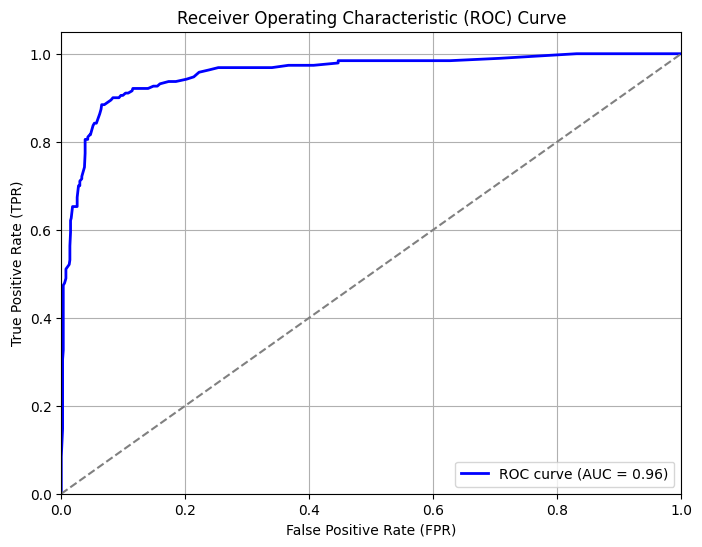

In [412]:
rfc_probs = rfc_model.predict_proba(X_test_1)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_1, rfc_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Print the AUC
print("AUC of Random Forest Classifier:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In Churn Prediction we are focused on True Positive Rate to prevent customer from churning.
As TPR is our focus we can take any threshold between 0.4 and 0.6 
default threshold is o.5
With 0.5 thresold the auc is 0.96 which very close to 1 
Random Forest Classifier is performing good.

# Saving Model to PKL file

In [411]:
with open('model.pkl', 'wb') as files:
    pickle.dump(rfc_model, files)

# Testing Model

In [401]:
test_data= df_1.sample(n=1)
test_data

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,Churn
2658,0.0,1,0.0,123,0.21865,4,5,0.530373,1


In [409]:
def Model(test_data):
  #outputs = scaler.transform(test_data)
  output=rfc_model.predict(test_data)
  if output == 1:
    print('churn')
  else:
    print('Not Churn')

In [410]:
Model([(0.0	,1	,0.0	,123	,0.21865	,4	,5	,0.530373		)])

churn
